In [291]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# 讀取資料

In [292]:
#讀取csv檔
data = np.loadtxt(open("D:\\AIA\\train.csv", encoding = 'utf8'), skiprows = 1, dtype = np.float, delimiter = ',', usecols = [1, 2, 3, 4, 6])

# 資料的分析以及創建

In [293]:
#建立自己需要的dictionary
data_dict = {"花萼長度":[data[i][0] for i in range(123)],
             "花萼寬度":[data[i][1] for i in range(123)],
             "花瓣長度":[data[i][2] for i in range(123)],
             "花瓣寬度":[data[i][3] for i in range(123)],
             "花朵種類":[data[i][4] for i in range(123)],
             "花瓣面積":[mul[i] for i in range(123)],
             "花萼面積":[mulf[i] for i in range(123)]}

#創建data提供以外的feature

#花瓣面積
mul = np.array([])
for i in range (123):
    mul1 = (data_dict["花瓣長度"][i]*data_dict["花瓣寬度"][i])
    mul = np.append(mul,mul1)

#花萼面積
mulf = np.array([])
for i in range (123):
    mulf1 = (data_dict["花萼長度"][i]*data_dict["花萼寬度"][i])
    mulf = np.append(mulf,mulf1)



經過觀察，花瓣面積可能會是一個不錯的Feature，因此創造了花瓣面積這項feature來做之後的測試

In [294]:
#檢視自己創建的data

datashow = pd.DataFrame(data = data_dict)
datashow[0:5]


,花朵種類,花瓣寬度,花瓣長度,花瓣面積,花萼寬度,花萼長度,花萼面積
0,1.0,0.2,1.5,0.30,3.7,5.4,19.98
1,1.0,0.2,1.6,0.32,3.4,4.8,16.32
2,1.0,0.1,1.4,0.14,3.0,4.8,14.40
3,1.0,0.1,1.1,0.11,3.0,4.3,12.90
4,1.0,0.2,1.2,0.24,4.0,5.8,23.20


C:\Users\ccw12\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


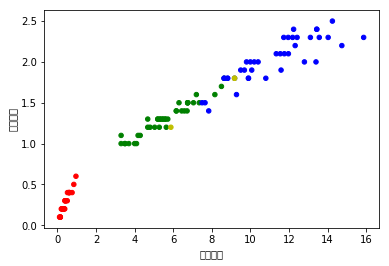

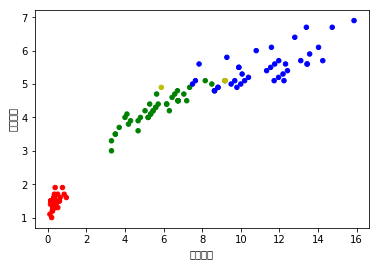

In [295]:
#將想要觀察的data可視化(二維)

color = {1.0:"r",2.0:"g",3.0:"b",4.0:"y"}
datashow['color'] = datashow['花朵種類'].map(color)
datashow.plot.scatter(x ="花瓣面積" , y ="花瓣寬度", c =datashow["color"])
datashow.plot.scatter(x ="花瓣面積" , y ="花瓣長度", c =datashow["color"])
plt.show()


將資料可視化後發現，在花瓣面積這個維度上(X軸)，花朵的種類已經可以初步的被肉眼區分出來


可以期待之後的分類測試能得到不錯的效果

C:\Users\ccw12\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


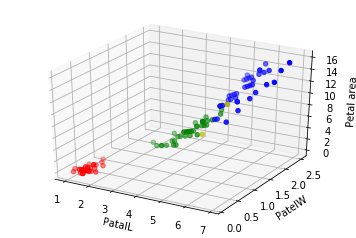

In [296]:
#將想要觀察的data可視化(三維)
fig=plt.figure()
show1 = fig.add_subplot(111 , projection='3d')

x = data_dict["花瓣長度"]
y = data_dict["花瓣寬度"]
z = data_dict["花瓣面積"]

show1.scatter(x,y,z, c=datashow["color"], marker='o')

show1.set_xlabel("PatalL")
show1.set_ylabel("PatelW")
show1.set_zlabel("Petal area")

plt.show()

將資料點撒在三維空間中再做一次觀察

In [297]:
#選定想使用的特徵製成dataset併分割成訓練集和測試集
X = datashow[['花瓣寬度','花瓣長度','花瓣面積']]
y = datashow['花朵種類']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=50)

將資料的15%做為測試集，其餘的資料當作訓練集

In [298]:
#將資料正規化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#檢視正規化後的資料(五筆)
X_train_std[0:5]

array([[-1.38559496, -1.55711483, -1.26151007],
       [-1.38559496, -1.43959673, -1.25271464],
       [ 0.75320839,  0.55821098,  0.58553045],
       [-1.38559496, -1.38083768, -1.24831692],
       [-0.04884286,  0.49945193, -0.07412688]])

#  預測模型建模

利用scikit_learn 所提供的各式預測模型做分類

In [268]:
svc = SVC(C=1.0, kernel="rbf", probability=True)
svc.fit(X_train_std, y_train)
print('SVC Score:',svc.score(X_test_std, y_test))



SVC Score: 1.0


首先是SVM，可以看到得到了不錯的成果

In [269]:
submission_svc = svc.predict(X_test_std)
print(submission_svc)
print('以下為實際答案\n',y_test)

[2. 1. 3. 1. 3. 1. 2. 3. 2. 2. 1. 1. 3. 2. 2. 1. 1. 1. 3.]
以下為實際答案
 44     2.0
21     1.0
80     3.0
16     1.0
118    3.0
3      1.0
61     2.0
86     3.0
72     2.0
54     2.0
7      1.0
12     1.0
83     3.0
40     2.0
75     2.0
39     1.0
34     1.0
17     1.0
88     3.0
Name: 花朵種類, dtype: float64


將svm得出的結果與實際答案顯示出來做比較

In [270]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=3, weights='uniform')
KNN.fit(X_train_std, y_train)
print('KNN Score:',clf1.score(X_test_std, y_test))

KNN Score: 1.0


在讓我們試試其他的測試模型

In [271]:
submission_KNN = KNN.predict(X_test_std)
print(submission_KNN)
print('以下為實際答案\n',y_test)

[2. 1. 3. 1. 3. 1. 2. 3. 2. 2. 1. 1. 3. 2. 2. 1. 1. 1. 3.]
以下為實際答案
 44     2.0
21     1.0
80     3.0
16     1.0
118    3.0
3      1.0
61     2.0
86     3.0
72     2.0
54     2.0
7      1.0
12     1.0
83     3.0
40     2.0
75     2.0
39     1.0
34     1.0
17     1.0
88     3.0
Name: 花朵種類, dtype: float64


可以看到，我們使用KNN後依然能得到不錯的分類成果

以此推論，花瓣的面積與長寬確實是一項不錯的分類特徵

# 實際對Data做分類

In [272]:
data_test = np.loadtxt(open("D:\\AIA\\test.csv", encoding = 'utf8'), skiprows = 1, dtype = np.float, delimiter = ',', usecols = [1, 2, 3, 4])

先將欲分類的csv檔抓進來

In [273]:
test_dict = {"花瓣長度":[data_test[i][2] for i in range(30)],
             "花瓣寬度":[data_test[i][3] for i in range(30)],
             "花瓣面積":[test_mul[i] for i in range(30)]}

#創建data提供以外的feature

#花瓣面積
test_mul = np.array([])
for i in range (30):
    test_mul1 = (test_dict["花瓣長度"][i]*test_dict["花瓣寬度"][i])
    test_mul = np.append(test_mul,test_mul1)
    


同樣的將花瓣面積這一項Feature創建出來

In [284]:
data_test = pd.DataFrame(data = test_dict)
data_test[0:5]

,花瓣寬度,花瓣長度,花瓣面積
0,0.2,1.4,0.28
1,0.2,1.4,0.28
2,0.2,1.3,0.26
3,0.2,1.5,0.30
4,0.2,1.4,0.28


將創建出來的資料列出來檢視一下

In [299]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(data_test)
data_test_std = sc.transform(data_test)
predict = svc.predict(data_test_std)
predict



array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 3., 3., 3., 3., 3., 3., 2., 3., 3., 3.])

最後實際對資料做分類並將分類結果顯示出來

# 資料輸出

In [300]:
result=[]
index=[]
for i in range(len(predict)):
    index.append(i+1)
    result.append(predict[i])
index=np.array(index)
result=np.array(result)
print(index)
print(result)
np.savetxt('D:\\AIA\\result.csv', np.column_stack((index,result)), fmt='%d', delimiter = ',',header=('id,type'),comments='')

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3.
 3. 3. 2. 3. 3. 3.]


將我們利用svm得出的結果存成csv檔並輸出

# 附上kaggle得分

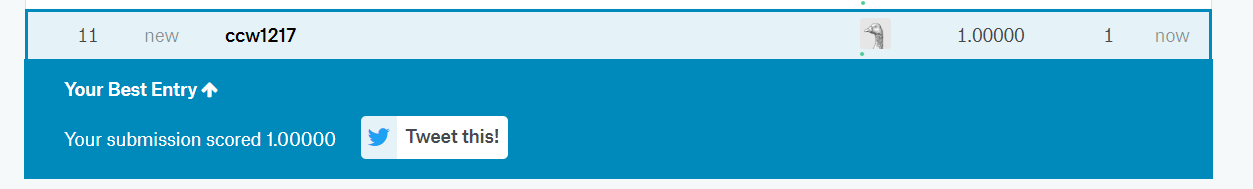